In [12]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [15]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Just like in the previous chapter, let's define the default font sizes to make the figures prettier:

In [18]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/classification` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [20]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

The website hosting the MNIST data seems to be down at the moment.  You can load the data in from a csv that I've put into github.

In [22]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', as_frame=False)

# # extra code – it's a bit too long
# print(mnist.DESCR)

# mnist.keys()  # extra code – we only use data and target in this notebook

# X, y = mnist.data, mnist.target

In [25]:
import pandas as pd
df = pd.read_csv('mnist_784.csv')
df.head(1000)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [27]:
df.describe()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [133]:
df.shape[0]

70000

### Q1:
What does `head(2)` do?

### A1:
head(2) shows the first 2 entries of a data frame. 

In [30]:
X = df.iloc[:, 0:784].values
y = df['class'].astype(str).values

### Q2:
 What is the `iloc` operator?  How is it different from the `loc` operator?

### A2:
Both iloc and loc are slicing operators that pull out the specified rows and columns in the given square brackets. "iloc' does this based on index, hence the "i". While "loc" does this based on label.

In [32]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
X.shape

(70000, 784)

In [34]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [35]:
y.shape

(70000,)

In [36]:
28 * 28

784

In [50]:
X[0].shape

(784,)

In [121]:
test = df[0]
final_el = test[-1]
print(final_el)
print(X[0])

KeyError: 0

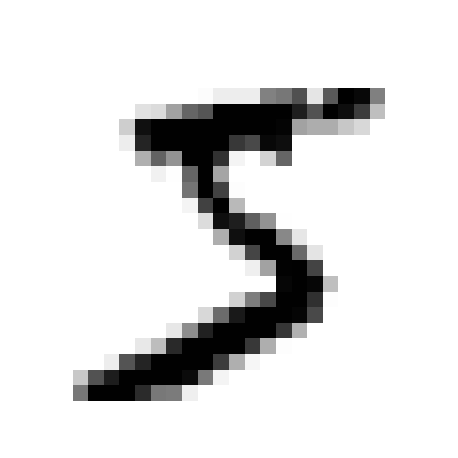

In [38]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

# **Modified Cell**

In [187]:
import numpy as np

def shift_image(image):

    # if image.shape != (28, 28):
    #     raise ValueError(f"Invalid pixel dimensions on image {image}")

    # capture class value
    target = image[-1]
    # remove class value from row of data so can isolate image pixels
    shift_image = image[1:-1]
    # make pixel array into 2d array for simplicity to work with
    shift_image = shift_image.reshape(28, 28)

    # fill padded variables
    up_image = np.zeros_like(shift_image)
    down_image = np.zeros_like(shift_image)
    left_image = np.zeros_like(shift_image)
    right_image = np.zeros_like(shift_image)

    # shift images and reformat them to be added to data set
    # then add the target value back in
    # ups
    up_image[:-1, :] = shift_image[1:, :]
    up_image.reshape(784,)
    up_image = np.append(up_image, target)
    # downs
    down_image[1:, :] = shift_image[:-1, :]
    down_image.reshape(784,)
    down_image = np.append(down_image, target)
    # lefts
    left_image[:, :-1] = shift_image[:, 1:]
    left_image.reshape(784,)
    left_image = np.append(left_image, target)
    # rights
    right_image[:, 1:] = shift_image[:, :-1]
    right_image.reshape(784,)
    right_image = np.append(right_image, target)

    # pd.concat only accepts series and data frames 
    # so i converted all the numpy arrays into dataframes
    up = pd.DataFrame(up_image)
    down = pd.DataFrame(down_image)
    left = pd.DataFrame(left_image)
    right = pd.DataFrame(right_image)   
    
    return up, down, left, right
    # plt.imshow(down_image, cmap='binary')
    # plt.axis('off')

    

# shift_image(X[0])
# plt.show()

In [169]:
# row = df.iloc[0].values
# up, down, left, right = shift_image(row)
# print(up)
# print(down)
# # concatonate 4 copies to original dataframe
# df = pd.concat([df, up])
# df = pd.concat([df, down])
# df = pd.concat([df, left])
# df = pd.concat([df, right])

# df.info()

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [189]:
rows = df.shape[0]
for i in range(rows):
    row = np.array(df.iloc[i].values)
    up, down, left, right = shift_image(row)
    # concatonate 4 copies to original dataframe
    df = pd.concat([df, up])
    df = pd.concat([df, down])
    df = pd.concat([df, left])
    df = pd.concat([df, right])

df.info()

KeyboardInterrupt: 

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514310 entries, 0 to 784
Columns: 786 entries, pixel1 to 0
dtypes: float64(786)
memory usage: 3.0 GB


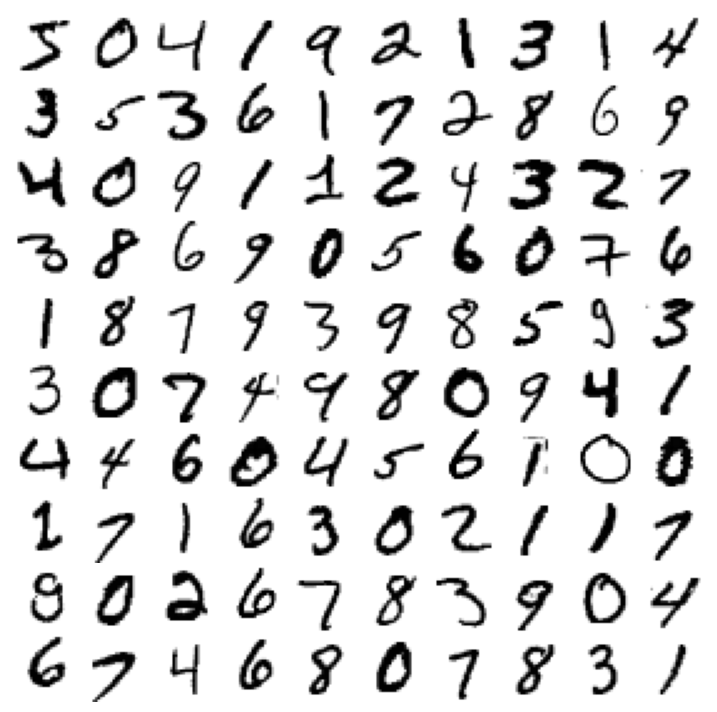

In [37]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

### Q3: 
What does the Python function `enumerate` do?

### A3:
Enumerate is a built-in function that makes it simpler to keep track of the indices when iterating over an iterable object. 

In [42]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# **Modified Cell**

In [ ]:
X = df.iloc[:, 0:784].values
y = df['class'].astype(str).values

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]